# Part1 - Pandas를 활용한 데이터 분석 

In [35]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


In [8]:
#주식 시세 구하는 함수: get_data_yahoo(조회할 주식 종목 [, start=조회 기간의 시작일] [, end=조회기간의 종료일]

# 

## 1.1 삼성전자와 마이크로소프트 주식 수익률 비교 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


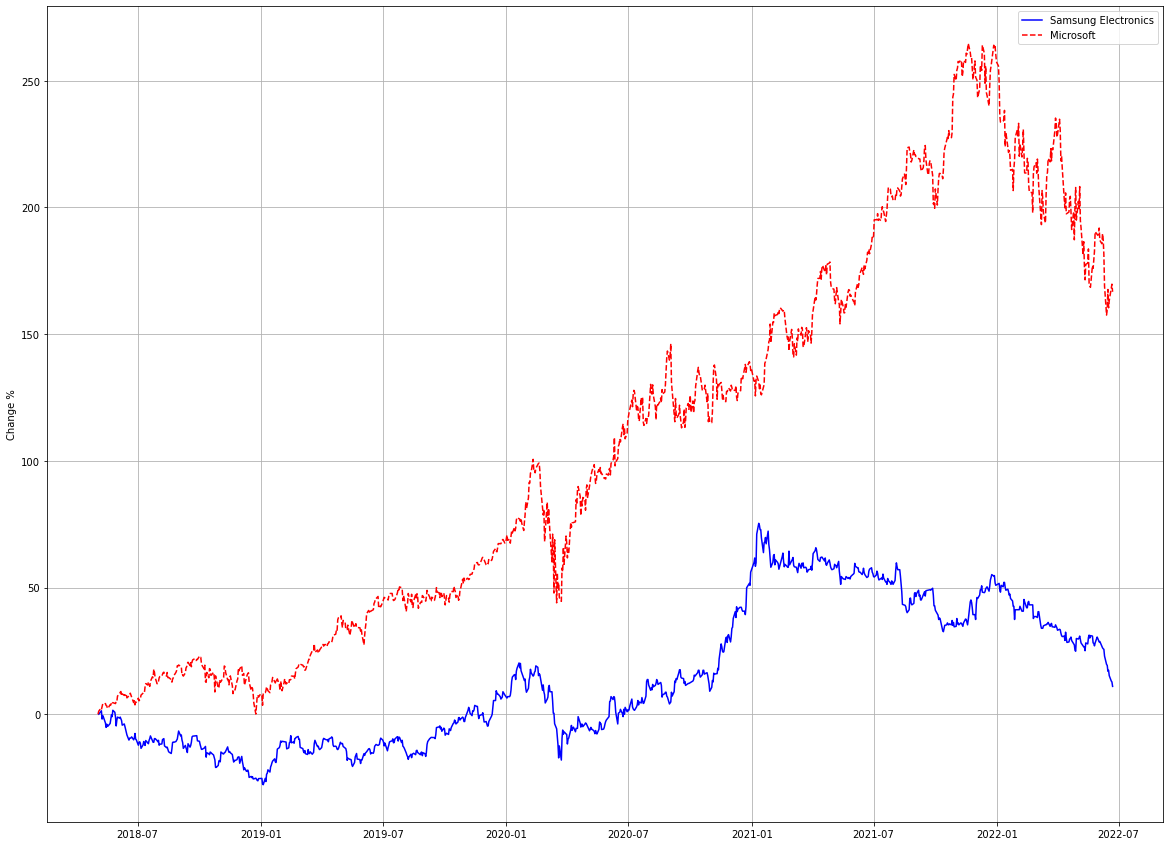

In [25]:
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0 # 일간 변동률의 첫 번째 값인 NaN을 0으로 변경한다.
sec_dpc_cp = ((100+sec_dpc)/100).cumprod()*100-100 # 일간 변동률 누적곱 계산

msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')
msft_dpc = (msft['Close'] / msft['Close'].shift(1) -1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cp = ((100+msft_dpc)/100).cumprod()*100-100
 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.plot(sec.index, sec_dpc_cp, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cp, 'r--', label='Microsoft')
plt.ylabel('Change %') 
plt.grid(True)
plt.legend(loc='best')
plt.show()


## 1.2 KOSPI의 최대 손실 낙폭(MDD) 

[*********************100%***********************]  1 of 1 completed


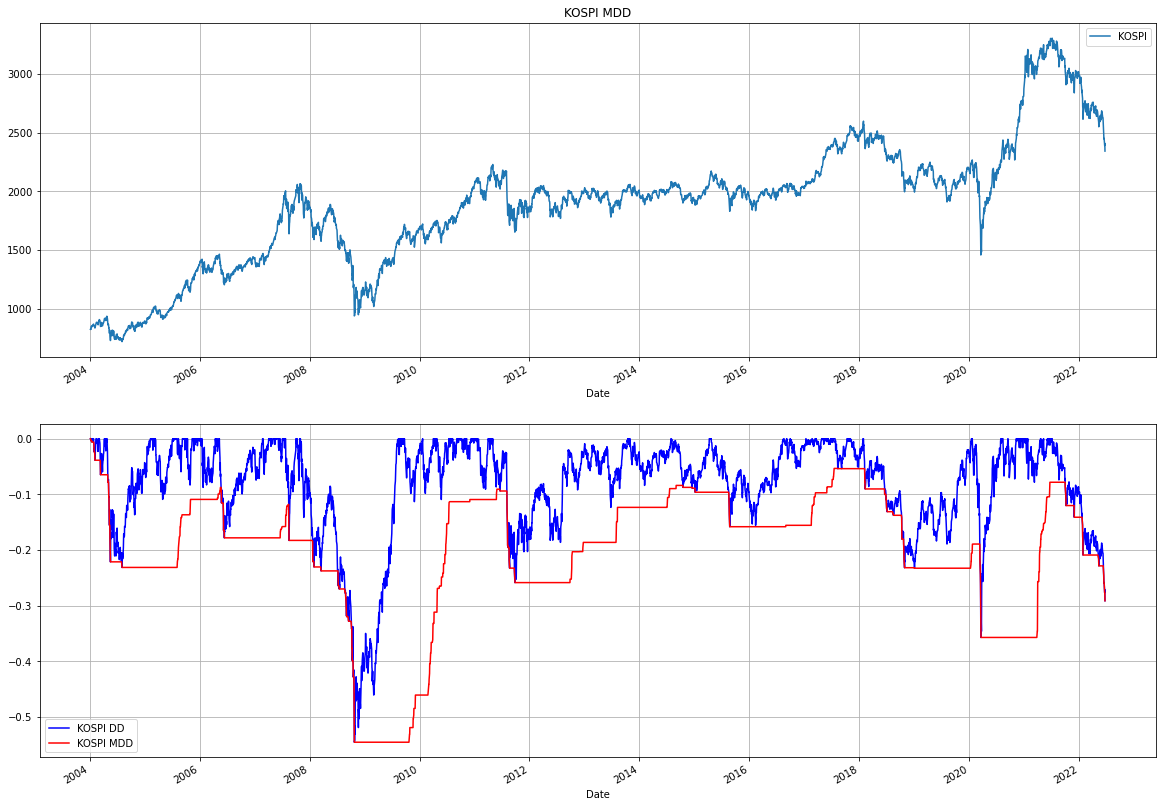

In [29]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()
 
plt.figure(figsize=(20, 15))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

## 1.3 다우존스 지수와 KOSPI의 산점도 분석

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


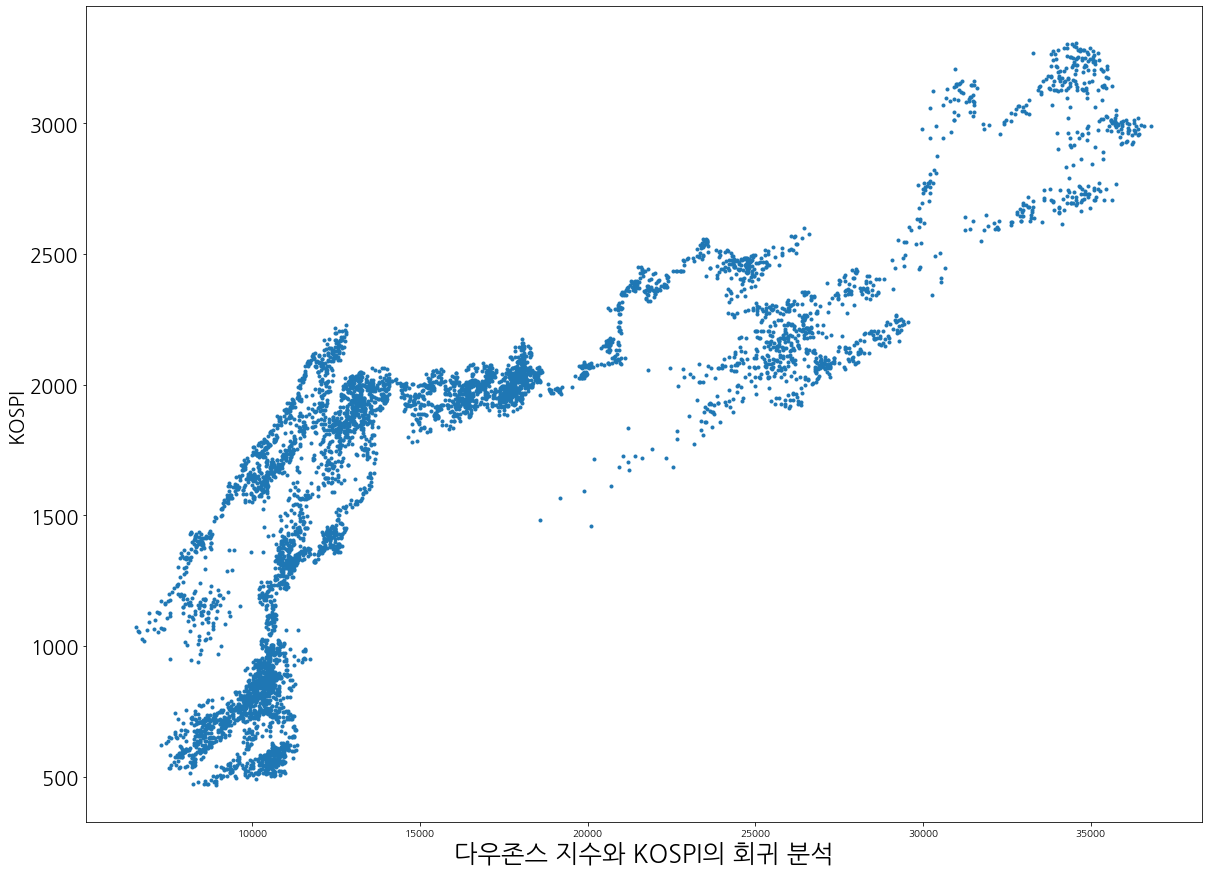

In [38]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
 
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('다우존스 지수와 KOSPI의 회귀 분석', size=25)
plt.ylabel('KOSPI')
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.show()


## 1.4 다우존스 지수와 KOSPI의 회귀 분석

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


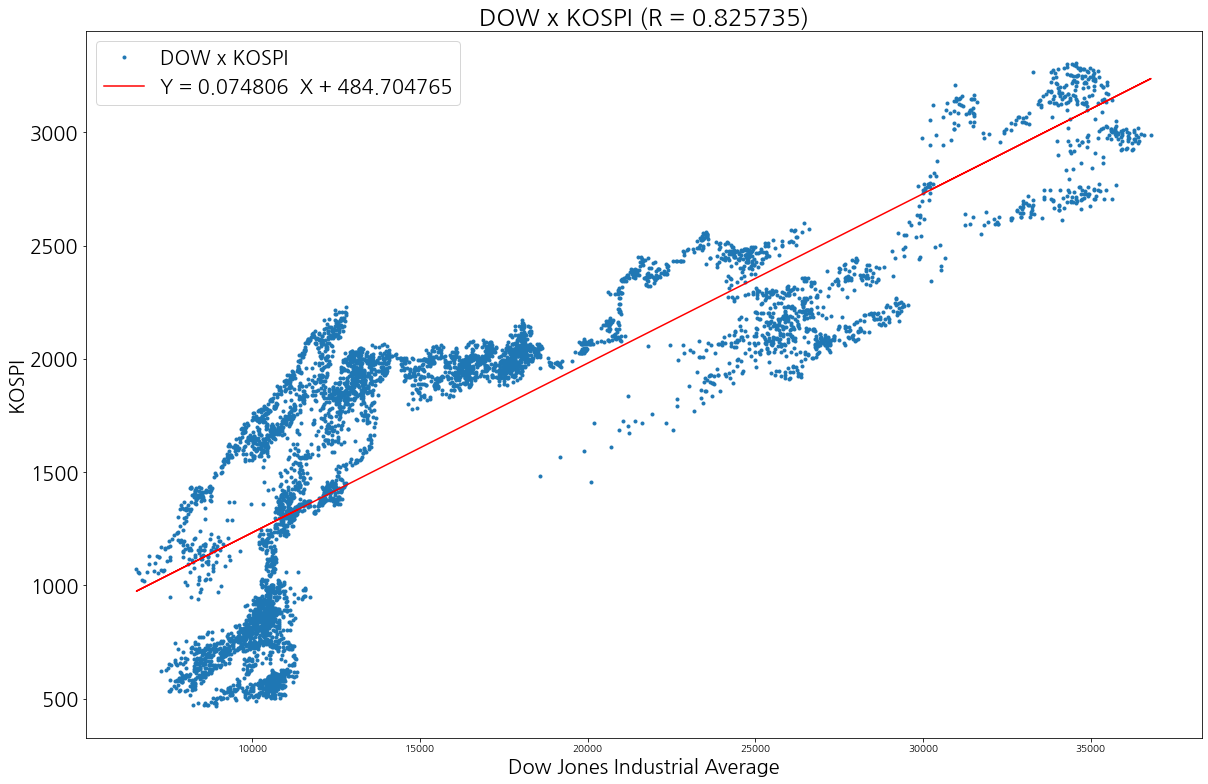

In [42]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')   
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X':dow['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

plt.figure(figsize=(20, 13))
plt.plot(df.X, df.Y, '.') 
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()